# 2 - Imports

### 2.1 - Bibliotecas Python

In [1]:
# Geral
import pandas as pd
import numpy as np
import seaborn as sns

# Dados
from sklearn import datasets

# Visualização dos dados
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Modelo de ML
from sklearn.neighbors import KNeighborsClassifier

# Normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# Padronização dos dados
from sklearn.preprocessing import StandardScaler

# Redução de dimensionalidade dos dados
from sklearn.decomposition import PCA

# Separação de dados para modelo de treino e teste
from sklearn.model_selection import train_test_split

# Verificação da acuracia do modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Otimização do Parametro
from sklearn.model_selection import GridSearchCV

### 2.2 - Funções

#### 2.2.1 - [Triangule Correlation Heatmap](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)

In [2]:
def triangule_correlation_heatmape(data):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool)) #função que cria uma matriz de zeros e um para ser utilizada com mascara
    
    sns.set_theme(style="white")
    
    plt.figure(figsize=(16,6))
    heatmap = sns.heatmap(corr,
                          mask= mask,
                          cmap="rocket_r",
                          annot=True,                       
                          linewidths=.5)
    
    heatmap.set_title("Triangle Correlation Heatmap", pad=16)
    
    plt.show()

#### 2.2.2 - Comparação de magnitude

In [3]:
def comparacao_magnitude_dos_dados(feature_to_compare, data):
    # Plot dos coeficientes das características
    plt.figure(figsize=(10, 6))

    markers = ['o', 's', '^', 'v', '<', '>', 'p', '*']
    
    for i, feature in enumerate(features_to_compare):
        marker = markers[i % len(markers)]
        plt.plot(data[feature], marker, label=feature)
    
    plt.legend(loc='best')
    plt.ylabel('Magnitude do Coeficiente')
    plt.xlabel('Índice do Coeficiente')
    plt.title('Comparação da Magnitude dos Coeficientes das Características')
    plt.show()


#### 2.2.3 - Train Model Function

In [4]:
def train_and_evaluate_model(name, X, y):
    #create model
    knn = KNeighborsClassifier()
    
    #split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)
    
    #apply scaling on training data and train the model
    knn.fit(X_train, y_train)
    
    #predict the validation set
    resultado = knn.predict(X_test)
    
    #evaluate the model
    score = accuracy_score(y_test, resultado)
    
    #adding error and score, to the scores dataframe
    model_scores.loc[len(model_scores)] = [name, score]
    
    print('----------------------------------')
    print('Matriz de Confusão')
    print('----------------------------------')
    print(pd.crosstab(y_test, resultado, rownames=['Real'], colnames=['        Predição'], margins= True))
        
    print('----------------------------------')
    print(f'DataFrame {name} Report')
    print('----------------------------------')
    print(f'Score: {score}')
        
    print('\n\n--------------------------------------------------------------------')
    print('                    Metricas de Classificação')
    print('--------------------------------------------------------------------')
    print(classification_report(y_test, resultado, target_names= wine.target_names))  


#### 2.2.4 - Visualização de Fronteiras

In [5]:
def plot_fronteiras(data, n_vizinhos, name):
    X = data    
    y = df_wine["class"].values
    
    knn = KNeighborsClassifier(n_neighbors= n_vizinhos)
    knn.fit(X, y)
    plt.figure(figsize= (8, 5))
    plot_decision_regions(X, y, clf= knn, legend= 2)
    plt.xlabel('alcohol')
    plt.ylabel('malic_acid')
    plt.title(f'DataFrame {name} - KNN')

# 3 - Aquisição dos Dados

Os dados utilizados serão do conjunto de testes **wine**. 

Disponiel em:
1. [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine)
2. [Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/wine-dataset/data)
3. [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)

### 3.1 - Carregando a Base de Dados

In [6]:
wine = datasets.load_wine()

### 3.2 - Criando o Dataframe

In [7]:
df_wine = pd.DataFrame(data=wine["data"],
                       columns= wine["feature_names"])

In [8]:
df_wine["class"] = wine["target"]

# 4 - Exploração dos dados para Insights

### 4.1 - Como os dados se parecem

In [9]:
df_wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  class  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

### 4.2 - Numero de Labels e Features

In [10]:
# Estrutura da base de dados: Labels, Features
print(f'Numero de Labels: {df_wine.shape[0]}')
print(f'Numero de Features: {df_wine.shape[1]}')

Numero de Labels: 178
Numero de Features: 14


### 4.3 - Verificando informações gerais e os tipos de dados

In [11]:
df_wine.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                             int32
dtype: object

In [12]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

### 4.4 - Estatistica dos dados

In [13]:
atributos_numericos = df_wine.select_dtypes(include=['int64', 'float64'])

ct1 = pd.DataFrame( atributos_numericos.apply( np.mean ) ).T
ct2 = pd.DataFrame( atributos_numericos.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( atributos_numericos.apply( np.std ) ).T
d2 = pd.DataFrame( atributos_numericos.apply( min ) ).T
d3 = pd.DataFrame( atributos_numericos.apply( max ) ).T
d4 = pd.DataFrame( atributos_numericos.apply( lambda x: x.max()-x.min() ) ).T
d5 = pd.DataFrame( atributos_numericos.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( atributos_numericos.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

attributes     min      max    range        mean  \
0                        alcohol   11.03    14.83     3.80   13.000618   
1                     malic_acid    0.74     5.80     5.06    2.336348   
2                            ash    1.36     3.23     1.87    2.366517   
3              alcalinity_of_ash   10.60    30.00    19.40   19.494944   
4                      magnesium   70.00   162.00    92.00   99.741573   
5                  total_phenols    0.98     3.88     2.90    2.295112   
6                     flavanoids    0.34     5.08     4.74    2.029270   
7           nonflavanoid_phenols    0.13     0.66     0.53    0.361854   
8                proanthocyanins    0.41     3.58     3.17    1.590899   
9                color_intensity    1.28    13.00    11.72    5.058090   
10                           hue    0.48     1.71     1.23    0.957449   
11  od280/od315_of_diluted_wines    1.27     4.00     2.73    2.611685   
12                       proline  278.00  1680.00  1402.00  746.893258   

     median         std      skew  kurtosis  
0    13.050    0.809543 -0.051482 -0.852500  
1     1.865    1.114004  1.039651  0.299207  
2     2.360    0.273572 -0.176699  1.143978  
3    19.500    3.330170  0.213047  0.487942  
4    98.000   14.242308  1.098191  2.104991  
5     2.355    0.624091  0.086639 -0.835627  
6     2.135    0.996049  0.025344 -0.880382  
7     0.340    0.124103  0.450151 -0.637191  
8     1.555    0.570749  0.517137  0.554649  
9     4.690    2.311765  0.868585  0.381522  
10    0.965    0.227929  0.021091 -0.344096  
11    2.780    0.707993 -0.307285 -1.086435  
12  673.500  314.021657  0.767822 -0.248403

In [14]:
df_wine.describe(include="all")

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

            class  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

### 4.5 - Quantidade de valores nulos por Feature

In [15]:
# Estrutura da base de dados: Quantidade elementos nulos por Feature
df_wine.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

### 4.6 - Verificando quantidade de valores duplicados

In [16]:
df_wine.duplicated().any()

False

### 4.7 - Verificando quantidade de valores unicos por Feature

In [17]:
df_wine.apply(lambda x: len(x.unique()))

alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
class                             3
dtype: int64

### 4.8 - Vendo a distribuição de valores do target

In [18]:
df_wine['class'].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

### 4.9 - Explorando as Features

In [19]:
for feature in df_wine.columns:
    print('-------------------------')
    print(f'Series: {feature}')
    print('-------------------------')
    print(f'{df_wine[feature].value_counts()}\n')
    

-------------------------
Series: alcohol
-------------------------
alcohol
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: count, Length: 126, dtype: int64

-------------------------
Series: malic_acid
-------------------------
malic_acid
1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: count, Length: 133, dtype: int64

-------------------------
Series: ash
-------------------------
ash
2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: count, Length: 79, dtype: int64

-------------------------
Series: alcalinity_of_ash
-------------------------
alcalinity_of_ash
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: count, Length: 63, dtype: int64

-------------------------
Series: magnesium
--------------

### 4.10 Correlation

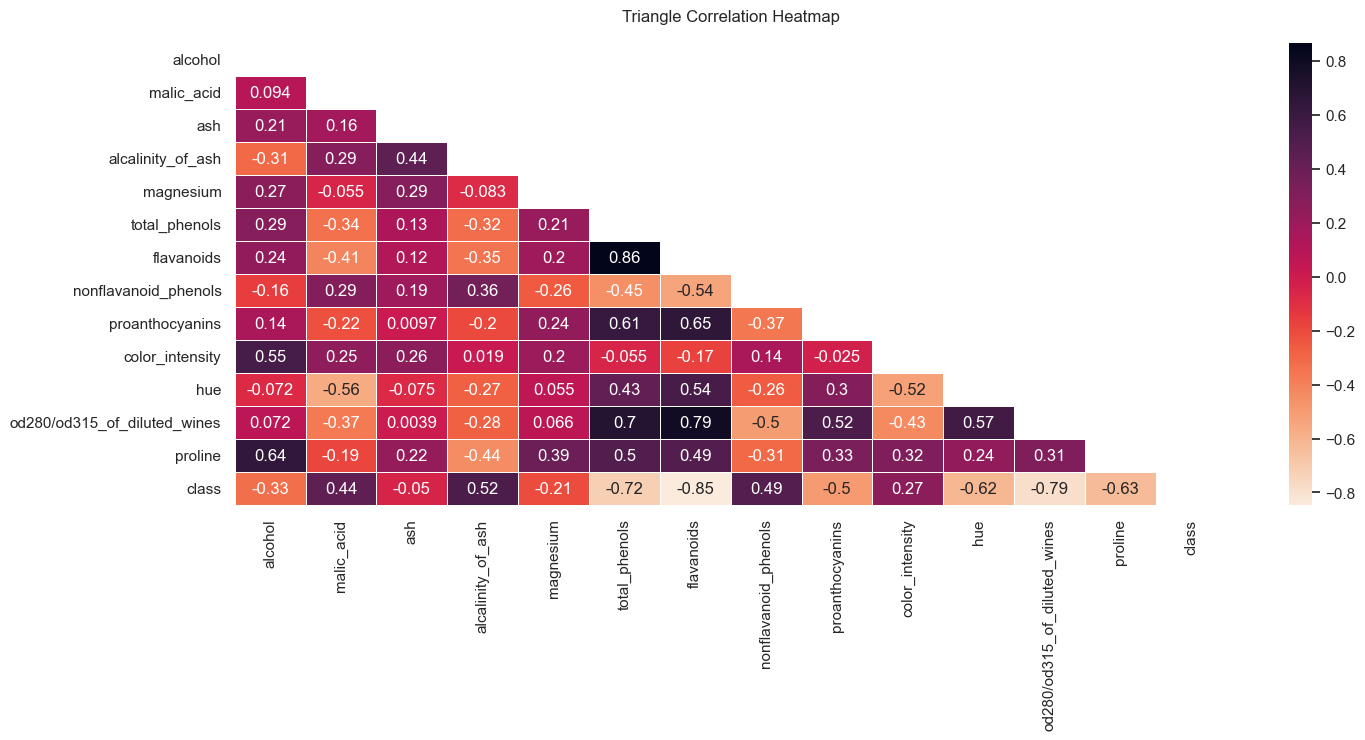

In [20]:
triangule_correlation_heatmape(df_wine)

### 4.11 - Pairplot

<Figure size 1600x600 with 0 Axes>

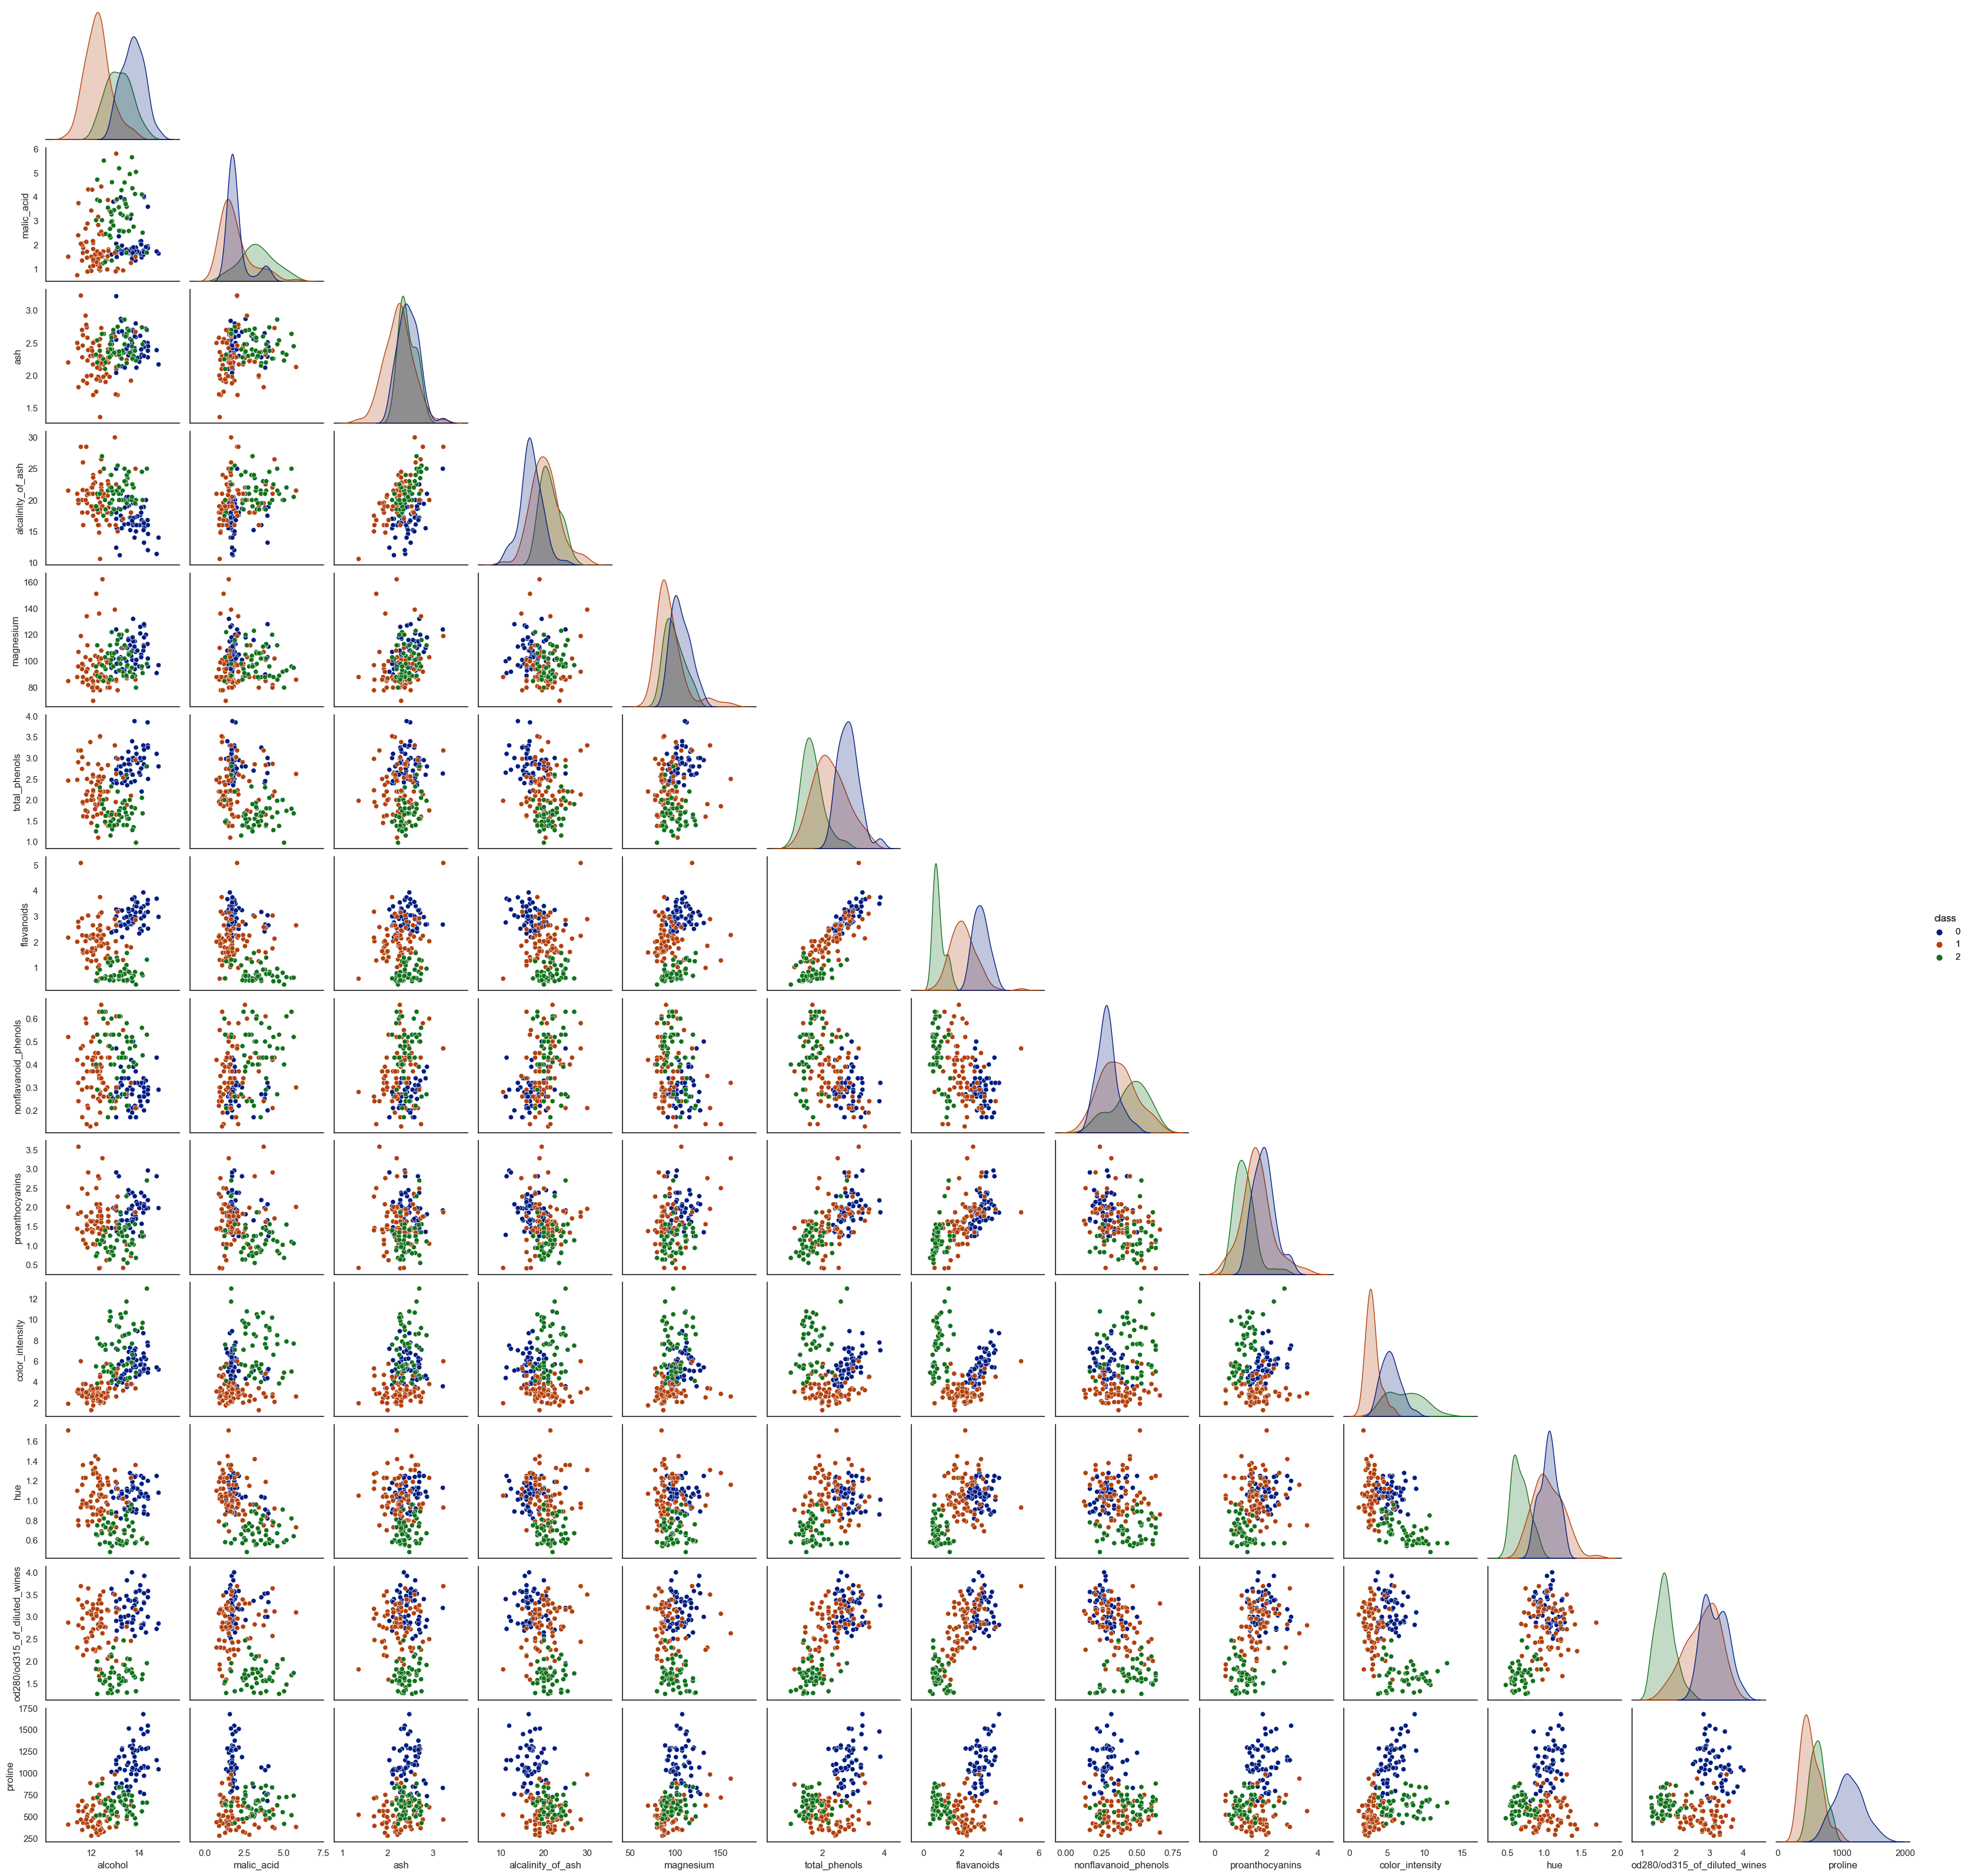

In [21]:
plt.figure(figsize=(16,6))

pairplot = sns.pairplot(df_wine,
                        hue='class',
                        palette="dark",
                        corner=True)

pairplot.add_legend()

plt.show()

### 4.12 - Verfiando a distribuição de características

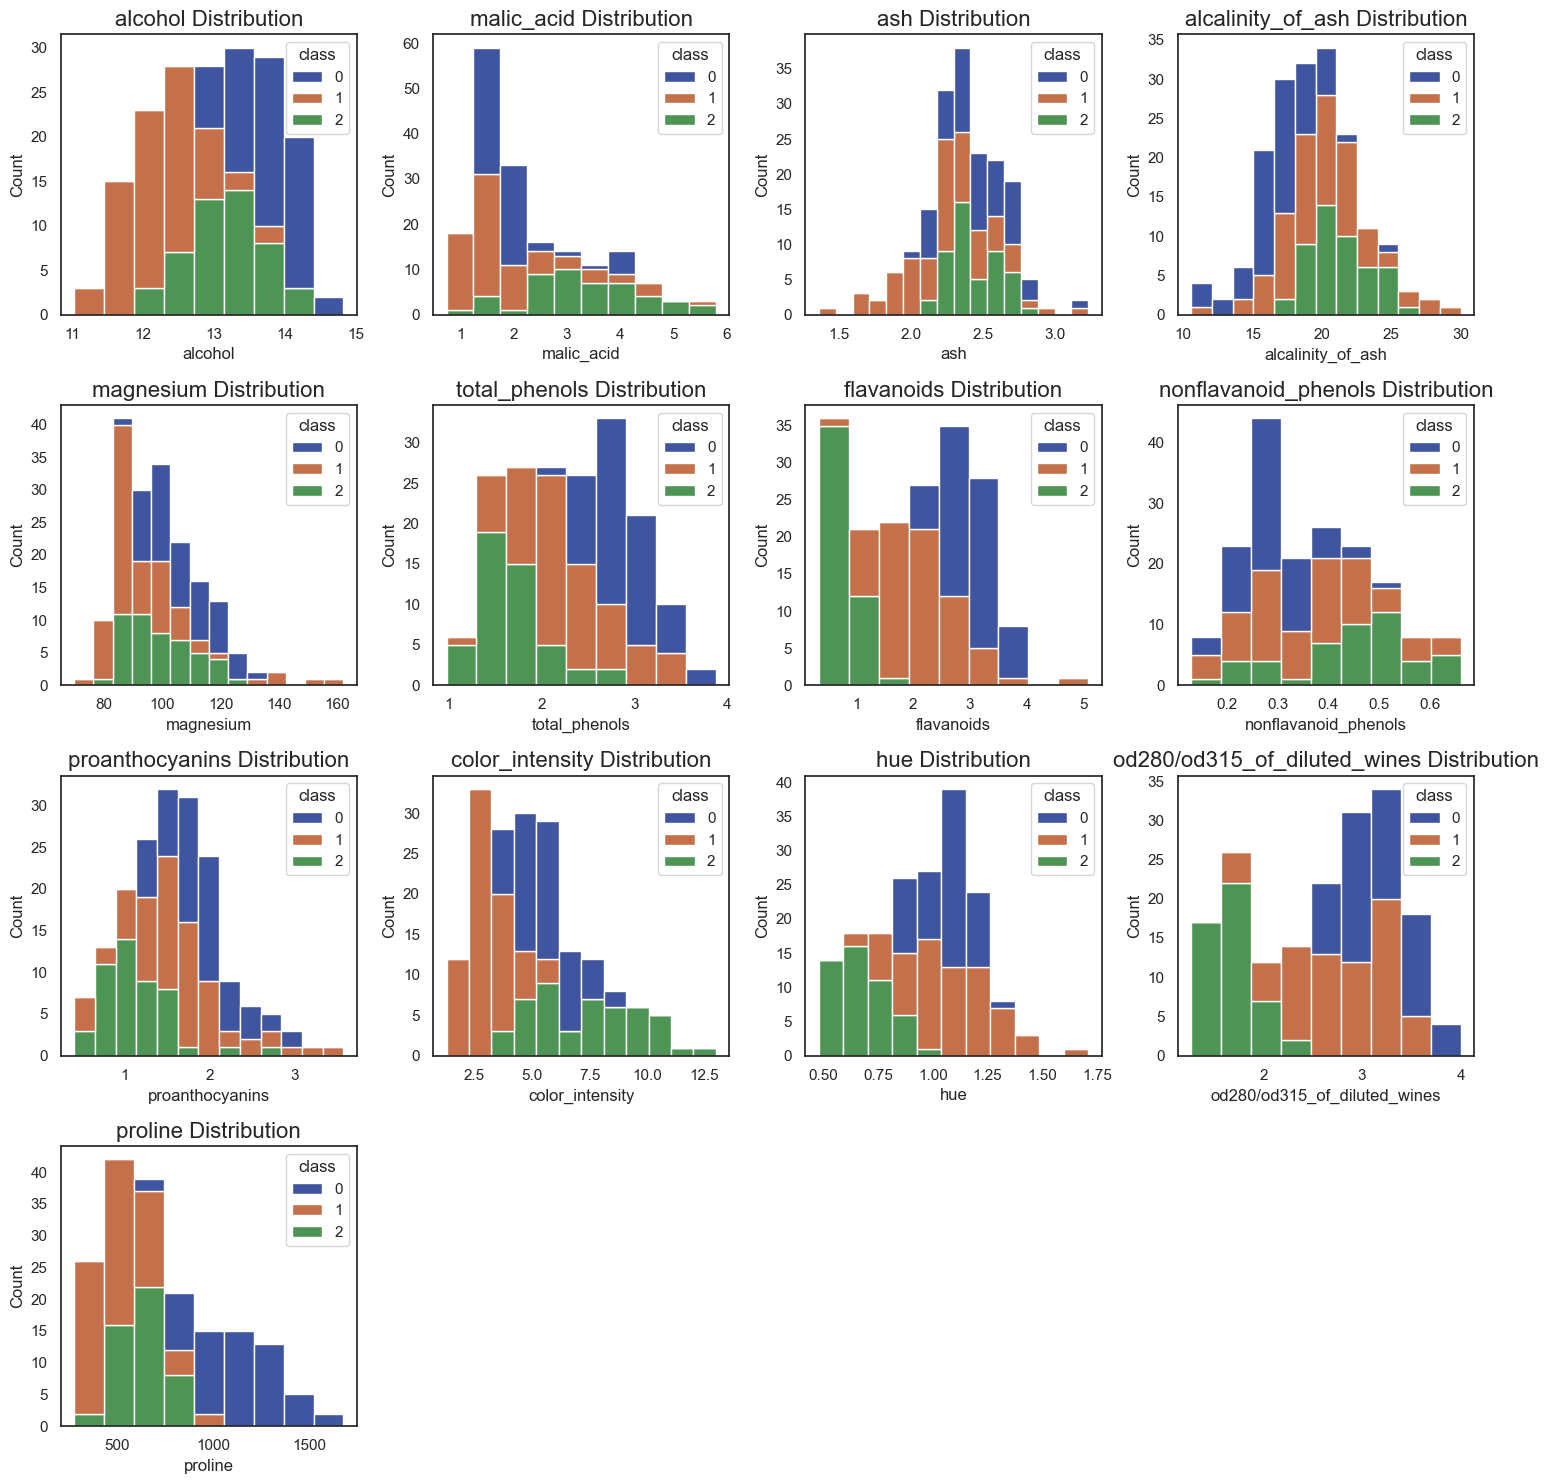

In [22]:
plt.figure(figsize=(15, 15))

num_rows = 4
num_cols = 4

for i, col in enumerate(df_wine.drop(columns='class').columns):    
    plt.subplot(num_rows, num_cols, i + 1)    
    sns.histplot(data=df_wine, x=col, hue='class', multiple="stack", palette="dark")   
    plt.title(f'{col} Distribution', fontsize=16)


plt.tight_layout()
plt.show()

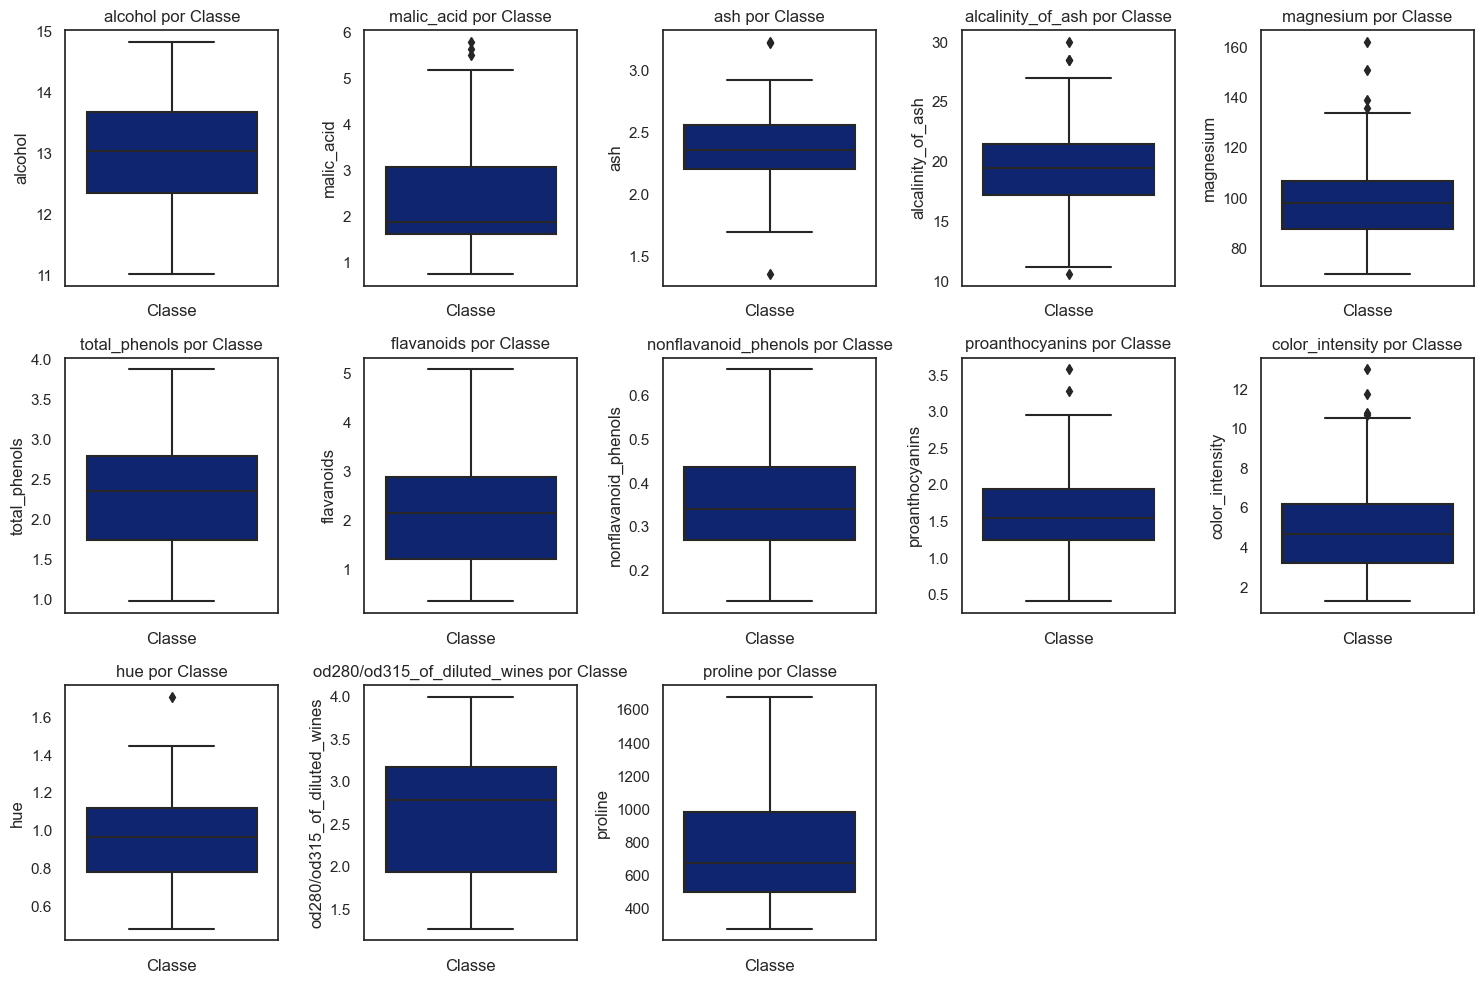

In [23]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(df_wine.columns[:-1]):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=feature, hue='class', data=df_wine, palette='dark')
    plt.title(f'{feature} por Classe')
    plt.xlabel('Classe')
    plt.ylabel(feature)

plt.tight_layout()

plt.show()


### 4.13 - Magnitude dos Coeficientes

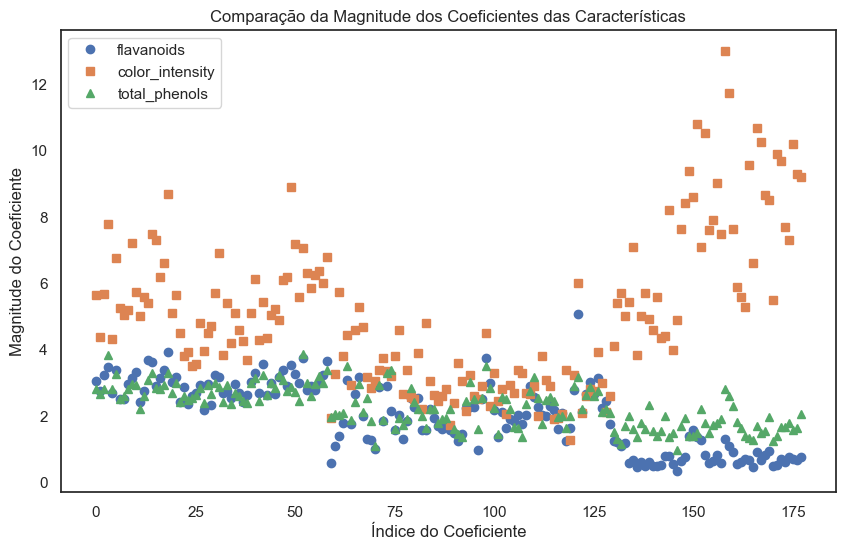

In [24]:
features_to_compare = ['flavanoids', 'color_intensity', 'total_phenols']

comparacao_magnitude_dos_dados(features_to_compare, df_wine)

## 4.14 - Insights

**Geral**
*   As informações ciddas sobre o dataset estão corretas
    *   Features: 14 (acrescentando o target)
    *   Labels: 178
    *   Dados numericos: float64, int32
    *   Sem dados categoricos
    *   Sem valores nulos
    *   Sem valores duplicados
    *   Target contendo 3 opções: 0, 1, 2 (int32)

**Flavanoids**
*   Maior correlação entre as features
    *   Total Phenols: 0.86
    *   OD280/OD315 of diluted wines: 0.79
*   Menor correlação com o  target
    *   Class: -0.85

**Separação dos dados**
*   Proline, entre todas as features, é a que tem melhor separação. Principalmente para class = 0
*   Color_intensity também se destaca mas exclusivamente com Flavanoids e Total_phenols


**Transformação**
*   Os dados se encontram em uma escala completamente diferente. Seja no sumario, analises ou nos graficos de distribuição fica nitido o quão grande é essa variação.
    *  Menor valor em Nonflavanoid Phenols: 0.13
*    Redução de dimensionalidade com PCA 

# 5 - Transformação e Limpeza

### 5.1 - Padronização dos dados

In [25]:
obj_padronizado = StandardScaler().fit(df_wine)

In [26]:
obj_padronizado = obj_padronizado.transform(df_wine)

In [27]:
obj_padronizado

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.21394365],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.21394365],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.21394365],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.37386437],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.37386437],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.37386437]])

In [28]:
df_wine_padronizado = pd.DataFrame(obj_padronizado, columns=df_wine.columns)

In [29]:
df_wine_padronizado.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline     class  
0         0.251717  0.362177                      1.847920  1.013009 -1.213944  
1        -0.293321  0.406051                      1.113449  0.965242 -1.213944  
2         0.269020  0.318304                      0.788587  1.395148 -1.213944  
3         1.186068 -0.427544                      1.184071  2.334574 -1.213944  
4        -0.319276  0.362177                      0.449601 -0.037874 -1.213944

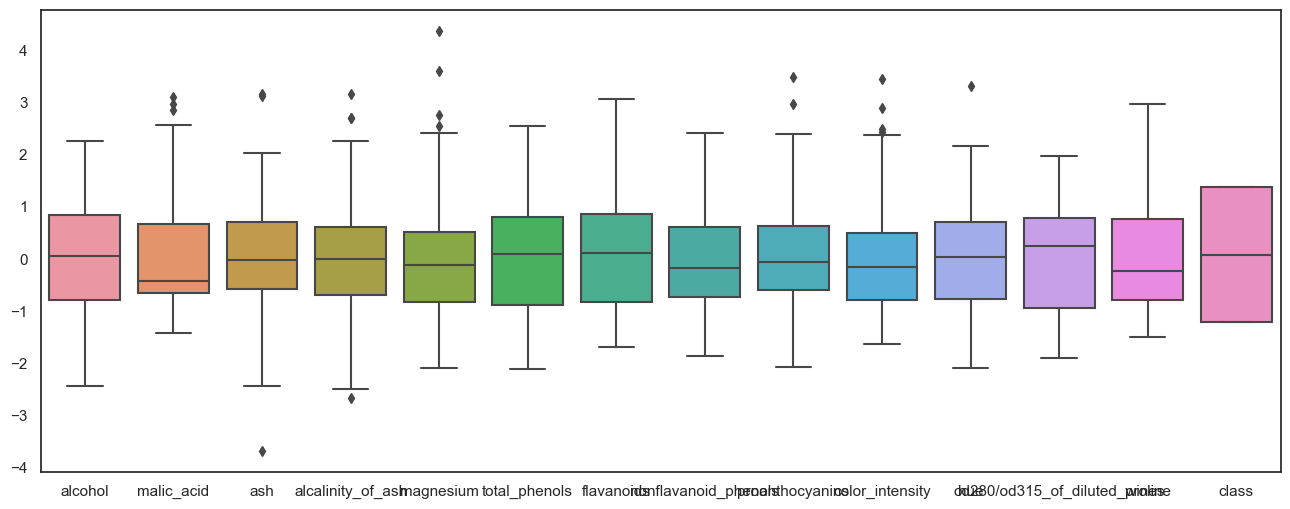

In [30]:
plt.figure(figsize=(16,6))

ax = sns.boxplot(df_wine_padronizado)

### 5.2 - Aplicando PCA

In [31]:
n_components = 2

pca = PCA(n_components)

pca_treinado = pca.fit(obj_padronizado)

principal_components_padronizado = pca_treinado.fit_transform(obj_padronizado)

In [32]:
principal_components_padronizado[:10]

array([[-3.5229339 , -1.45309844],
       [-2.52885806,  0.33001925],
       [-2.78502898, -1.03693595],
       [-3.92258841, -2.76821026],
       [-1.40751111, -0.86777309],
       [-3.28812981, -2.13017513],
       [-2.75057754, -1.17916999],
       [-2.39286652, -1.61128232],
       [-2.79525633, -0.92317952],
       [-3.00559666, -0.79628417]])

In [33]:
explained_variance = pca.explained_variance_ratio_

df_wine_padronizado_pca = pd.DataFrame(principal_components_padronizado,
                                       columns=[f'PC{i+1}'for i in range(n_components)])

df_wine_padronizado_pca

PC1       PC2
0   -3.522934 -1.453098
1   -2.528858  0.330019
2   -2.785029 -1.036936
3   -3.922588 -2.768210
4   -1.407511 -0.867773
..        ...       ...
173  3.627996 -2.206617
174  2.942729 -1.752263
175  3.027272 -2.756040
176  2.755222 -2.293784
177  3.496336 -2.760608

[178 rows x 2 columns]

### 5.3 - Nomralização dos dados

In [34]:
obj_normalizado = MinMaxScaler().fit(df_wine)

In [35]:
obj_normalizado = obj_normalizado.transform(df_wine)

In [36]:
obj_normalizado

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.97069597, 0.56134094,
        0.        ],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.78021978, 0.55064194,
        0.        ],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.6959707 , 0.64693295,
        0.        ],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.10622711, 0.39728959,
        1.        ],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.12820513, 0.40085592,
        1.        ],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.12087912, 0.20114123,
        1.        ]])

In [37]:
df_wine_normalizado = pd.DataFrame(obj_normalizado, columns=df_wine.columns)

In [38]:
df_wine_normalizado.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  class  
0         0.372014  0.455285                      0.970696  0.561341    0.0  
1         0.264505  0.463415                      0.780220  0.550642    0.0  
2         0.375427  0.447154                      0.695971  0.646933    0.0  
3         0.556314  0.308943                      0.798535  0.857347    0.0  
4         0.259386  0.455285                      0.608059  0.325963    0.0

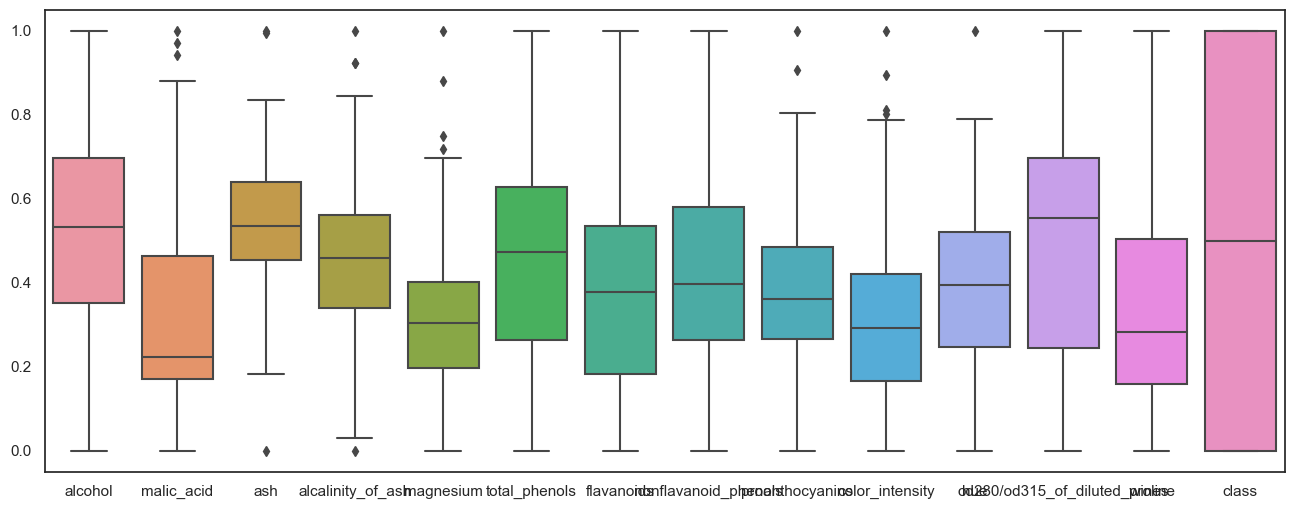

In [39]:
plt.figure(figsize=(16,6))

ax = sns.boxplot(df_wine_normalizado)

In [40]:
df_wine_padronizado_pca.head()

PC1       PC2
0 -3.522934 -1.453098
1 -2.528858  0.330019
2 -2.785029 -1.036936
3 -3.922588 -2.768210
4 -1.407511 -0.867773

<Figure size 1600x600 with 0 Axes>

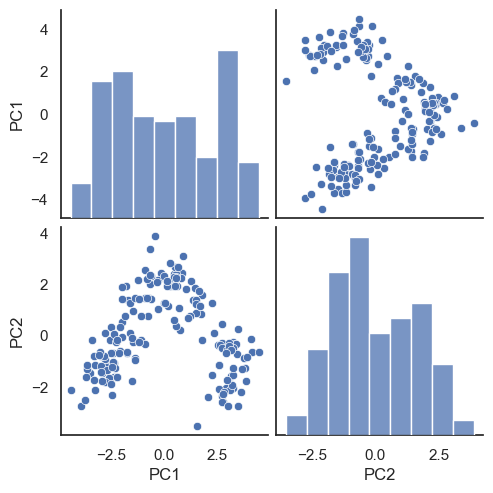

In [41]:
plt.figure(figsize=(16,6))

sns.pairplot(df_wine_padronizado_pca)

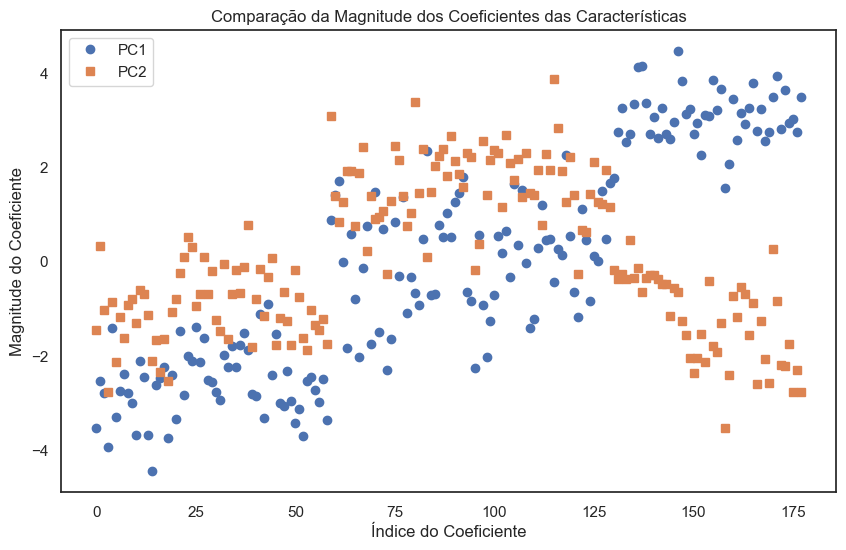

In [42]:
features_to_compare = ['PC1', 'PC2']

comparacao_magnitude_dos_dados(features_to_compare, df_wine_padronizado_pca)

In [43]:
df_wine_normalizado.head()

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  class  
0         0.372014  0.455285                      0.970696  0.561341    0.0  
1         0.264505  0.463415                      0.780220  0.550642    0.0  
2         0.375427  0.447154                      0.695971  0.646933    0.0  
3         0.556314  0.308943                      0.798535  0.857347    0.0  
4         0.259386  0.455285                      0.608059  0.325963    0.0

<Figure size 1600x600 with 0 Axes>

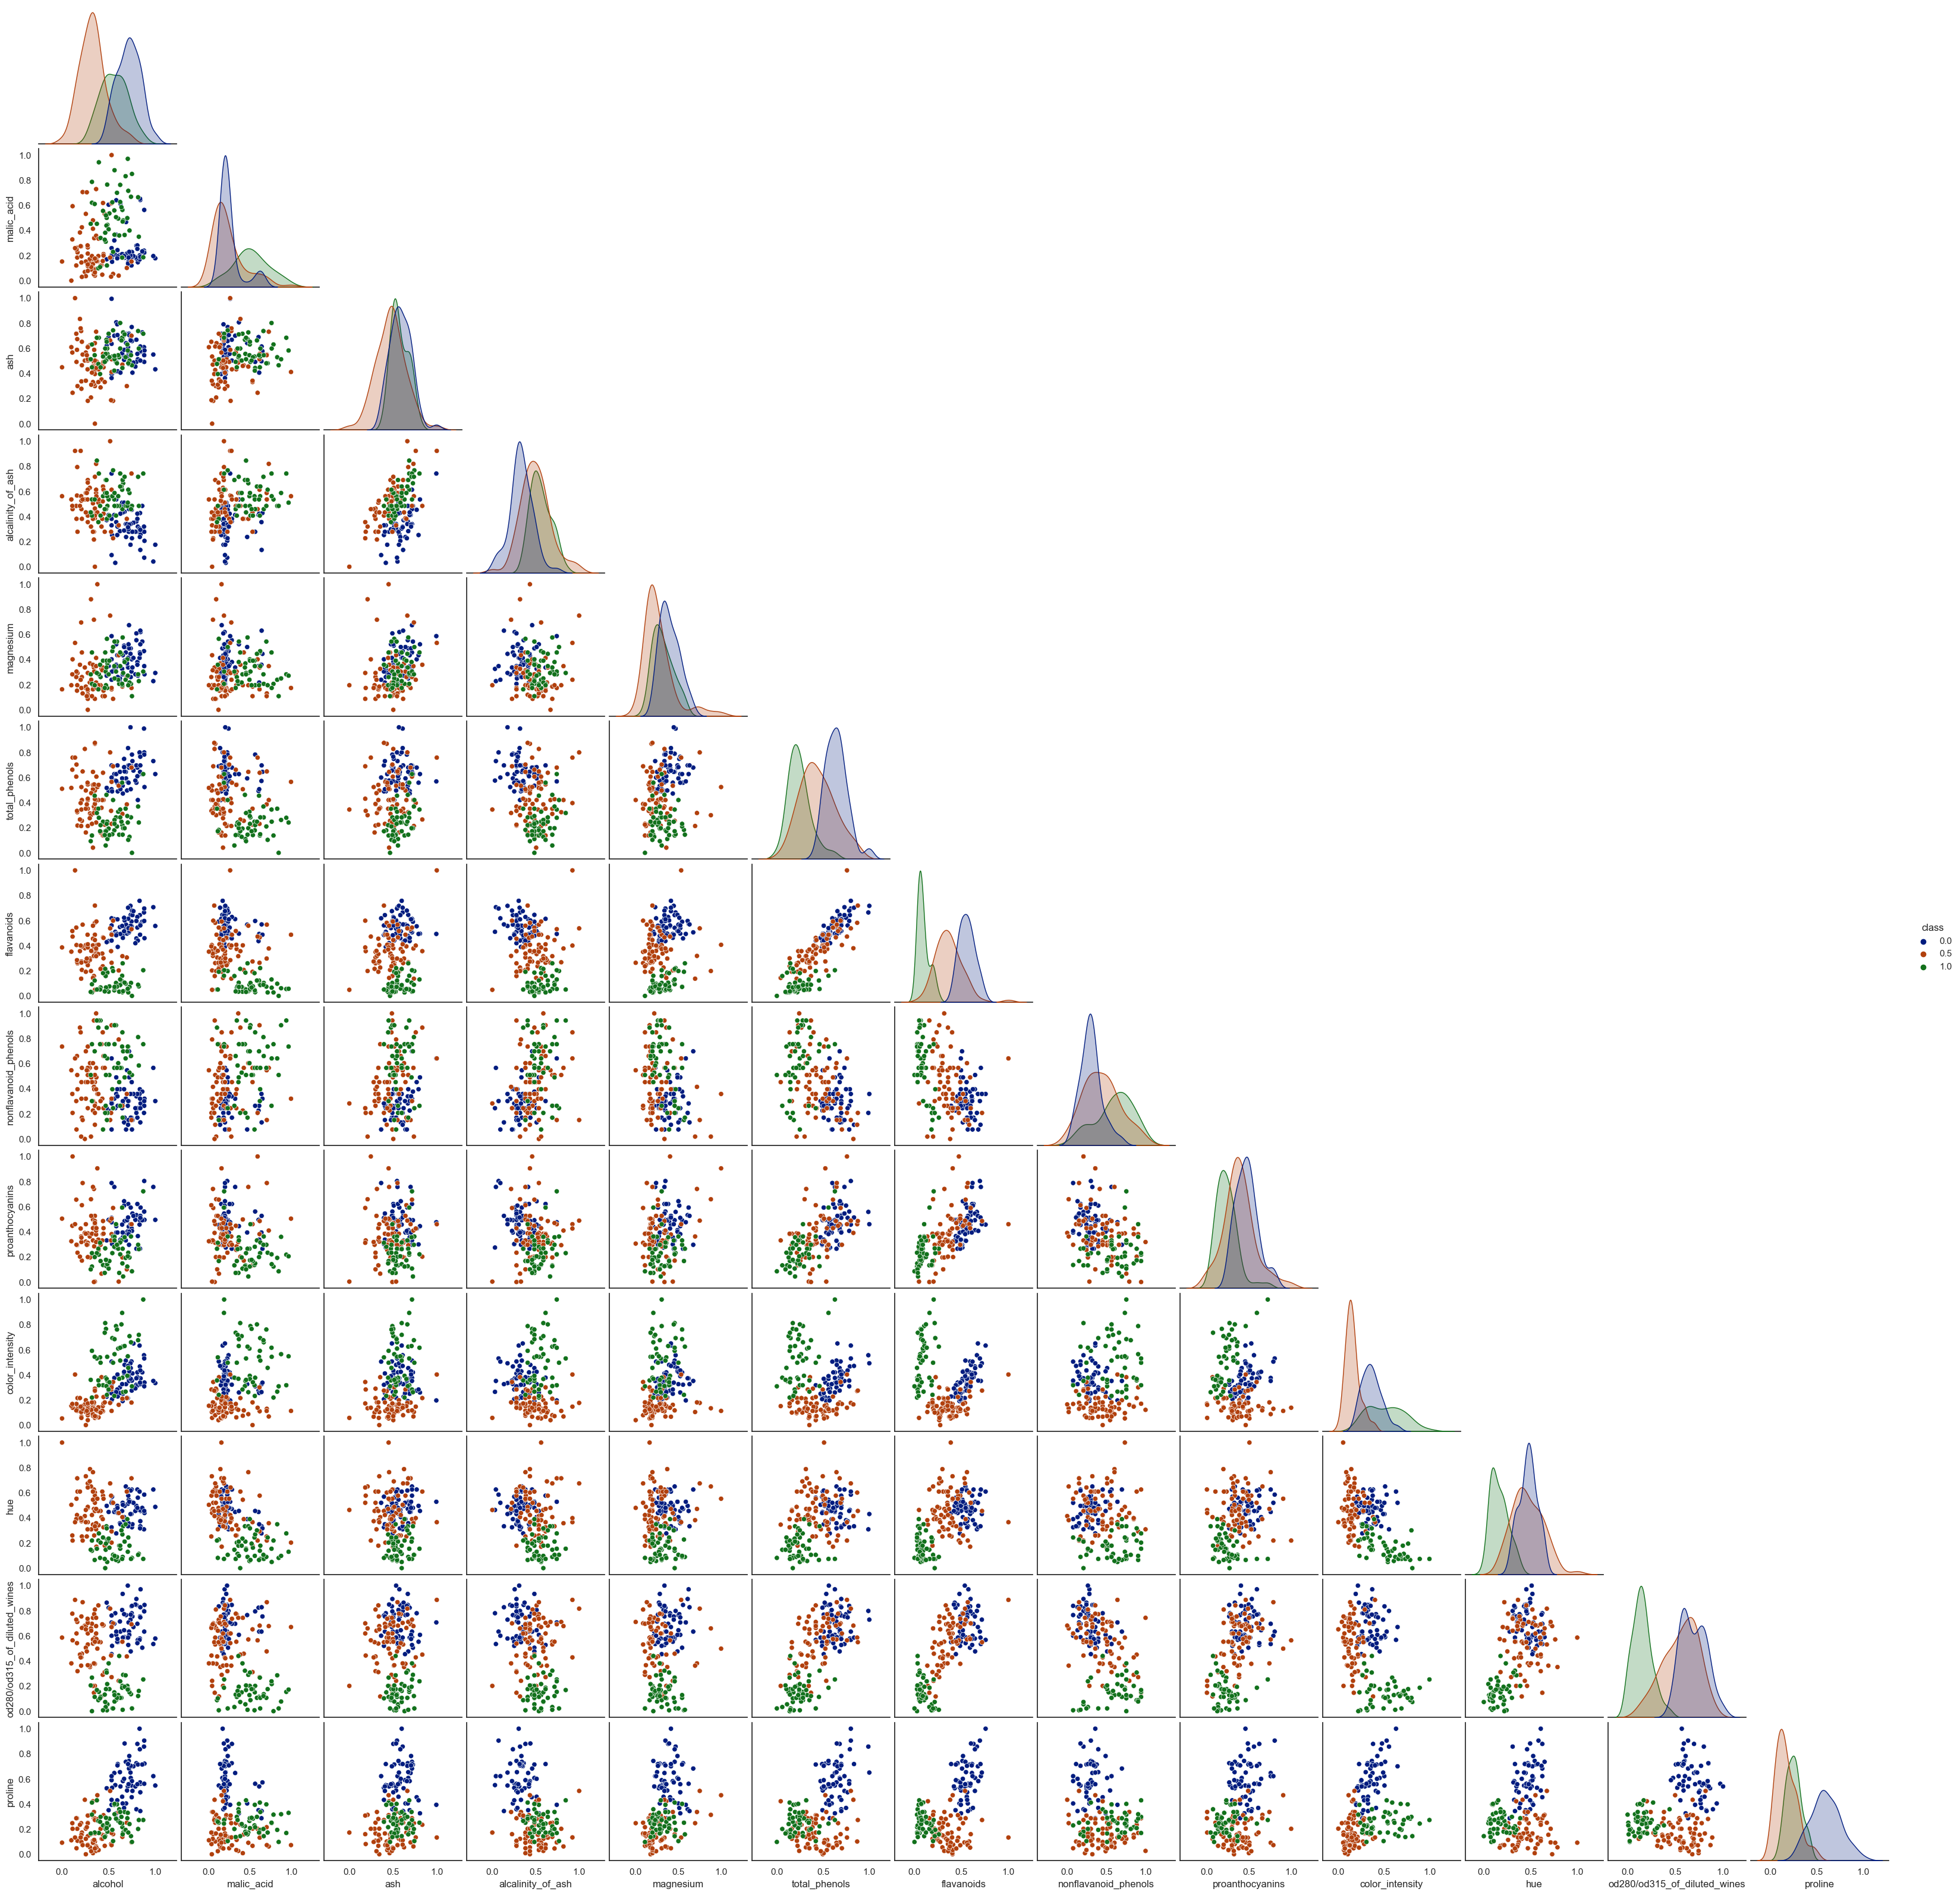

In [44]:
plt.figure(figsize=(16,6))

sns.pairplot(df_wine_normalizado,
             hue="class",
             palette="dark",
             corner=True)

plt.show()

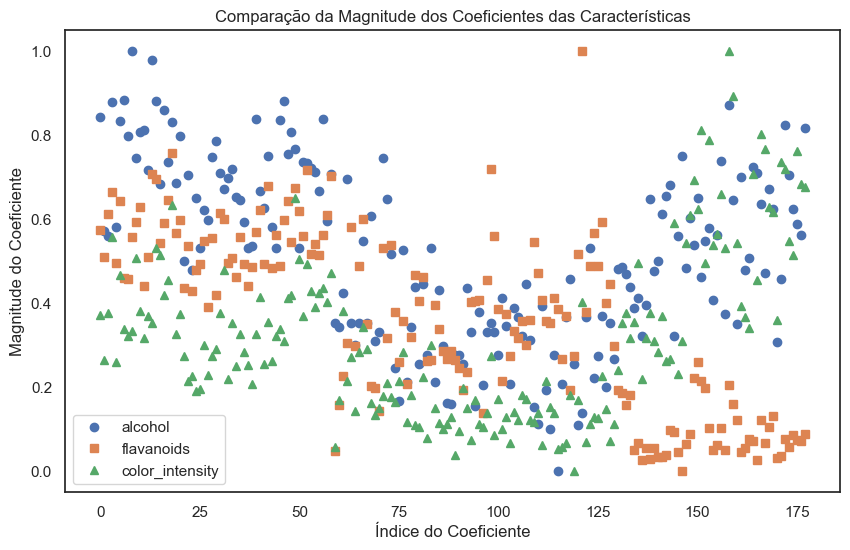

In [45]:
features_to_compare = ["alcohol", "flavanoids", "color_intensity"]

comparacao_magnitude_dos_dados(features_to_compare, df_wine_normalizado)

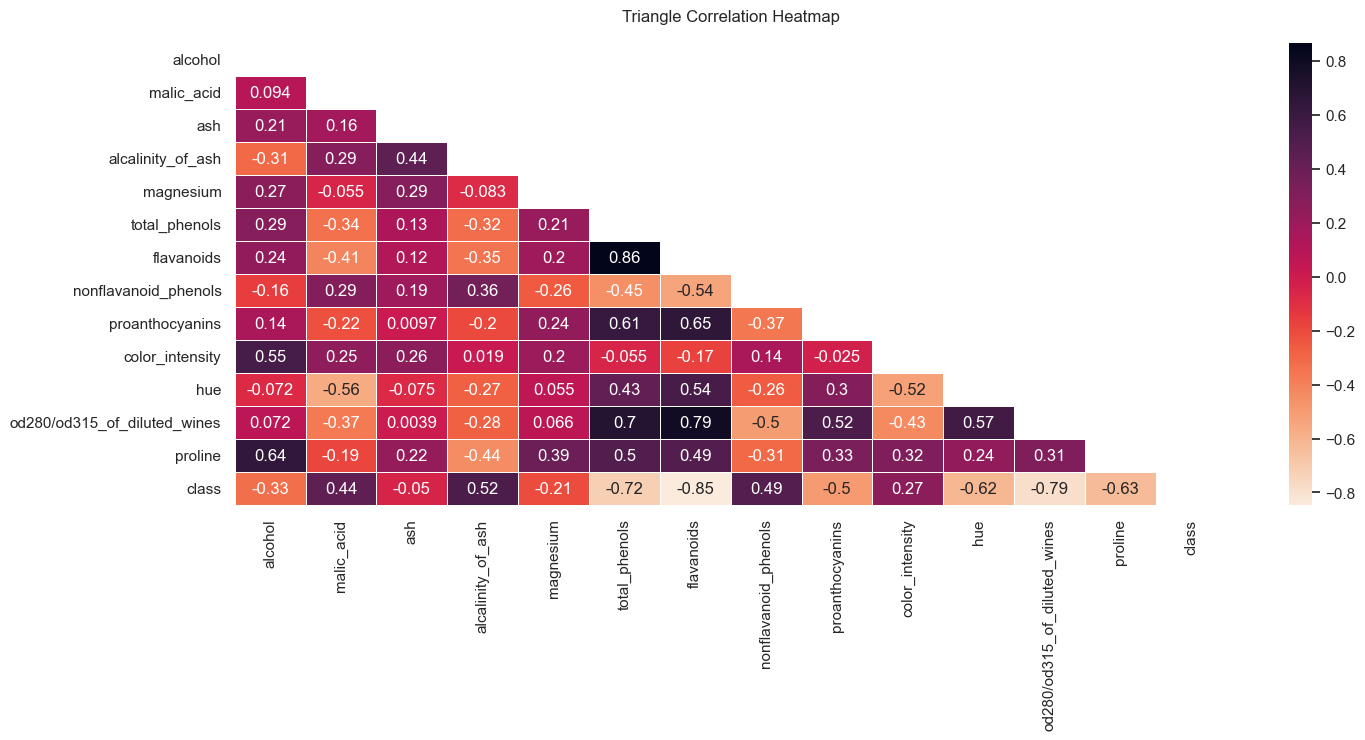

In [46]:
triangule_correlation_heatmape(df_wine_normalizado)

# 6 - Definição dos dados de Entrada e Saída

### 6.1 - Target Geral

In [47]:
df_target = df_wine["class"]

### 6.2 - Dados Originais

In [48]:
df_original = df_wine.drop('class', axis=1)

### 6.3 - Dados Padronizados

In [49]:
df_padronizados = df_wine_padronizado.drop('class', axis=1)

### 6.4 - Dados Normalizados

In [50]:
df_normalizado = df_wine_normalizado.drop('class', axis=1)

# 7 - Explorando o modelo

### 7.1 - KNN

Alguns parametors interessantes do **[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**
1. **n_neighbors**: Número de vizinhos (Deafult= 5).
2. **weights**: Peso de amostras vizinhas (Default= uniform)
3. **metric**: Métrica utilizada para o cálculo de distância (Default= minkowski).
4. **p**: Parametro de potência para a métrica (Default= 2, isso é equivalente Distância Euclidiana)
5. **n_jobs**: Número de jobs paralelos para executar no momento da busca de vizinhos. (Default= 1)

### 7.2 - Lista de acuracia

In [51]:
model_scores = pd.DataFrame(columns=['model', 'score'])

### 7.3 - Original

In [52]:
train_and_evaluate_model("Original", df_original, df_target)

----------------------------------
Matriz de Confusão
----------------------------------
        Predição   0   1   2  All
Real                             
0                 14   0   1   15
1                  4   8   5   17
2                  2   3   8   13
All               20  11  14   45
----------------------------------
DataFrame Original Report
----------------------------------
Score: 0.6666666666666666


--------------------------------------------------------------------
                    Metricas de Classificação
--------------------------------------------------------------------
              precision    recall  f1-score   support

     class_0       0.70      0.93      0.80        15
     class_1       0.73      0.47      0.57        17
     class_2       0.57      0.62      0.59        13

    accuracy                           0.67        45
   macro avg       0.67      0.67      0.65        45
weighted avg       0.67      0.67      0.65        45



### 7.4 - Padronizado

In [53]:
train_and_evaluate_model("Padronizado", df_padronizados, df_target)

----------------------------------
Matriz de Confusão
----------------------------------
        Predição   0   1   2  All
Real                             
0                 15   0   0   15
1                  2  14   1   17
2                  0   0  13   13
All               17  14  14   45
----------------------------------
DataFrame Padronizado Report
----------------------------------
Score: 0.9333333333333333


--------------------------------------------------------------------
                    Metricas de Classificação
--------------------------------------------------------------------
              precision    recall  f1-score   support

     class_0       0.88      1.00      0.94        15
     class_1       1.00      0.82      0.90        17
     class_2       0.93      1.00      0.96        13

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### 7.5 - PCA

In [54]:
train_and_evaluate_model("PCA", df_wine_padronizado_pca, df_target)

----------------------------------
Matriz de Confusão
----------------------------------
        Predição   0   1   2  All
Real                             
0                 15   0   0   15
1                  3  13   1   17
2                  0   0  13   13
All               18  13  14   45
----------------------------------
DataFrame PCA Report
----------------------------------
Score: 0.9111111111111111


--------------------------------------------------------------------
                    Metricas de Classificação
--------------------------------------------------------------------
              precision    recall  f1-score   support

     class_0       0.83      1.00      0.91        15
     class_1       1.00      0.76      0.87        17
     class_2       0.93      1.00      0.96        13

    accuracy                           0.91        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45



### 7.6 - Normalizado

In [55]:
train_and_evaluate_model("Normalizado", df_wine_normalizado, df_target)

----------------------------------
Matriz de Confusão
----------------------------------
        Predição   0   1   2  All
Real                             
0                 15   0   0   15
1                  1  16   0   17
2                  0   0  13   13
All               16  16  13   45
----------------------------------
DataFrame Normalizado Report
----------------------------------
Score: 0.9777777777777777


--------------------------------------------------------------------
                    Metricas de Classificação
--------------------------------------------------------------------
              precision    recall  f1-score   support

     class_0       0.94      1.00      0.97        15
     class_1       1.00      0.94      0.97        17
     class_2       1.00      1.00      1.00        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 7.7 - Summary

In [56]:
model_scores

model     score
0     Original  0.666667
1  Padronizado  0.933333
2          PCA  0.911111
3  Normalizado  0.977778

## 7.8 - Insights

**Geral**
*   Houve uma melhora significativa na acuracia do modelo.
*   Menor acuracia
    *   Os dados brutos, como esperado, sendo: ~0.67
*   Maior acuracia
    *   Os dados tratados, normalizados, sendo: ~0.98

**Forma Escolhida**
*   Afim de evitar Underfitting e Overfitting, os dados escolhidos serão:
    *   PCA: ~0.92

# 8 - Visualizando as fronteiras de complexidade

## 8.1 - k = 1

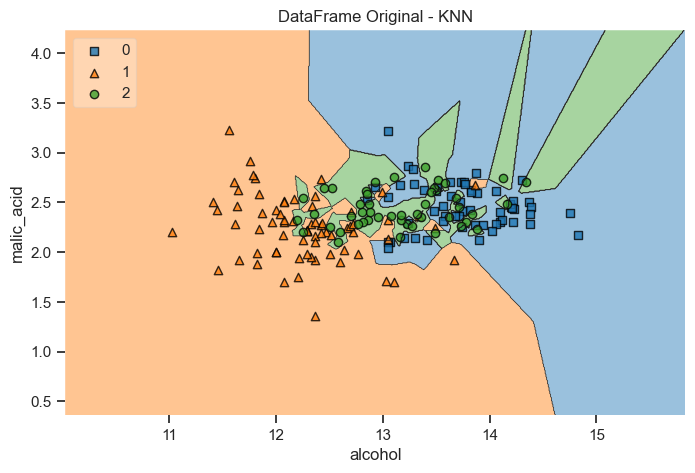

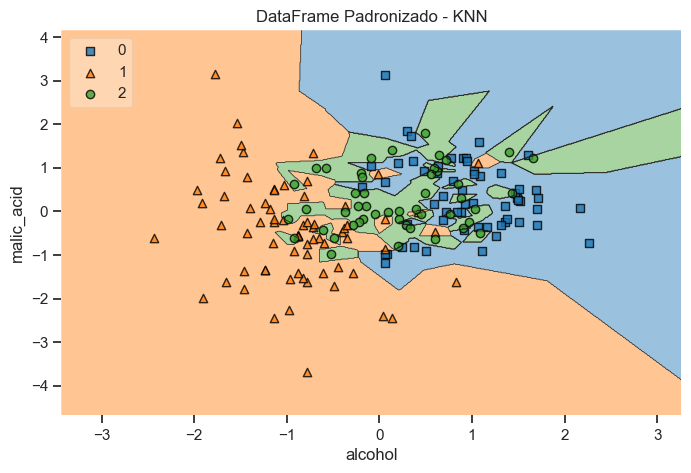

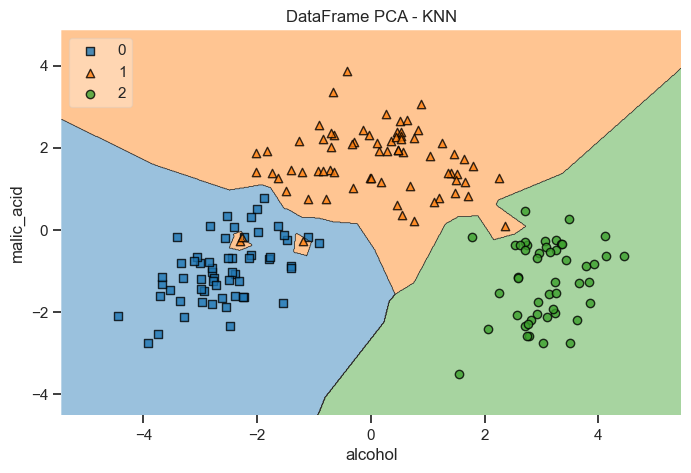

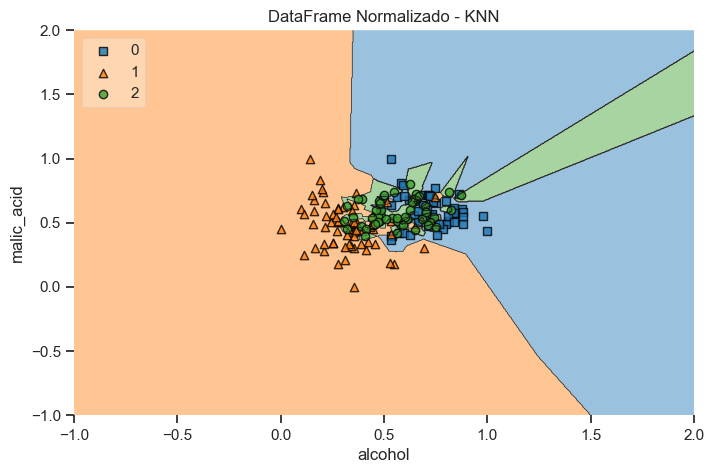

In [57]:
n_vizinhos = 1

X_value = df_wine[["alcohol","ash"]].values
plot_fronteiras(X_value, n_vizinhos, "Original")

X_value = df_wine_padronizado[["alcohol","ash"]].values
plot_fronteiras(X_value, n_vizinhos, "Padronizado")

X_value = df_wine_padronizado_pca[["PC1","PC2"]].values
plot_fronteiras(X_value, n_vizinhos, "PCA")

X_value = df_wine_normalizado[["alcohol","ash"]].values
plot_fronteiras(X_value, n_vizinhos, "Normalizado")

## 8.2 - k = 5

In [ ]:
n_vizinhos = 5

X_value = df_wine[["alcohol","ash"]].values
plot_fronteiras(X_value, n_vizinhos, "Original")

X_value = df_wine_padronizado[["alcohol","ash"]].values
plot_fronteiras(X_value, n_vizinhos, "Padronizado")

X_value = df_wine_padronizado_pca[["PC1","PC2"]].values
plot_fronteiras(X_value, n_vizinhos, "PCA")

X_value = df_wine_normalizado[["alcohol","ash"]].values
plot_fronteiras(X_value, n_vizinhos, "Normalizado")

## 8.3 - k = 15

In [ ]:
n_vizinhos = 15

X_value = df_wine[["alcohol","ash"]].values
plot_fronteiras(X_value, n_vizinhos, "Original")

X_value = df_wine_padronizado[["alcohol","ash"]].values
plot_fronteiras(X_value, n_vizinhos, "Padronizado")

X_value = df_wine_padronizado_pca[["PC1","PC2"]].values
plot_fronteiras(X_value, n_vizinhos, "PCA")

X_value = df_wine_normalizado[["alcohol","ash"]].values
plot_fronteiras(X_value, n_vizinhos, "Normalizado")